In [1]:
import pandas as pd
df_set = pd.read_csv('unique_data.csv')

In [2]:
import preprocess_df
corpus = preprocess_df.load_corpus(df_set, 'review_text')
docs = preprocess_df.corpus2docs(corpus)

In [3]:
import nltk
from nltk.probability import FreqDist

# Flatten the list of documents into a list of words
words = [word for doc in docs for word in doc]

# Get the frequency distribution
freq_dist = FreqDist(words)

print(freq_dist.most_common(20))

# # Print the frequency of each word
# for word, frequency in freq_dist.items():
#     print(f'{word}: {frequency}')

[('good', 79165), ('food', 77236), ('place', 76621), ('great', 56575), ('service', 36109), ('menu', 32722), ('restaurant', 30601), ('love', 29556), ('chicken', 28560), ('always', 28223), ('well', 28210), ('come', 26739), ('nice', 26618), ('bar', 26511), ('delicious', 25891), ('make', 25736), ('little', 25673), ('drink', 25248), ('best', 25005), ('table', 24649)]


In [4]:
import gensim
dictionary = gensim.corpora.Dictionary(docs)
vecs = preprocess_df.docs2vecs(docs, dictionary)

### try 5 topics to test output

In [5]:
lda = gensim.models.ldamodel.LdaModel(corpus=vecs, id2word=dictionary, num_topics=5)

In [6]:
topics = lda.show_topics(10, 5)

for i in range(0, 5):
    print(topics[i])

(0, '0.019*"chicken" + 0.016*"good" + 0.016*"food" + 0.011*"place" + 0.009*"sauce"')
(1, '0.016*"great" + 0.015*"food" + 0.015*"place" + 0.014*"good" + 0.013*"bar"')
(2, '0.032*"pizza" + 0.011*"fresh" + 0.010*"salad" + 0.010*"cheese" + 0.009*"great"')
(3, '0.011*"food" + 0.010*"place" + 0.008*"coffee" + 0.007*"good" + 0.006*"location"')
(4, '0.009*"cream" + 0.008*"flavor" + 0.007*"ice" + 0.007*"u" + 0.006*"chocolate"')


### Finding optimal k topics

In [7]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())
from tqdm import tqdm
from gensim.models import CoherenceModel

model_list = []
coherence_values = []
perplexity_values = []
model_topics = []
highest_coherence = 0
best_lda = None

# Iterate with a custom description
for num_topics in tqdm(range(2, 51, 1), desc="loading: "):
    lda_x = gensim.models.ldamodel.LdaModel(corpus=vecs, id2word=dictionary, num_topics=num_topics)
    coherencemodel = CoherenceModel(model=lda_x, texts=docs, dictionary=dictionary, coherence='c_v')
    # Compute Perplexity
    perplex= lda_x.log_perplexity(vecs, total_docs=None)
    if coherencemodel.get_coherence() > highest_coherence:
        highest_coherence = coherencemodel.get_coherence()
        best_lda = lda_x
    model_topics.append(num_topics)
    model_list.append(lda_x)
    coherence_values.append(coherencemodel.get_coherence())
    perplexity_values.append(perplex)
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2024-04-03 18:12:15.558087


loading:   2%|▏         | 1/49 [02:13<1:46:24, 133.01s/it]

#Topics: 2 Score: 0.3311552230732574


loading:   4%|▍         | 2/49 [04:17<1:40:09, 127.86s/it]

#Topics: 3 Score: 0.3320708617233988


loading:   6%|▌         | 3/49 [06:20<1:36:17, 125.59s/it]

#Topics: 4 Score: 0.3520633715812823


loading:   8%|▊         | 4/49 [08:23<1:33:27, 124.62s/it]

#Topics: 5 Score: 0.3611001248133883


loading:  10%|█         | 5/49 [10:30<1:32:10, 125.69s/it]

#Topics: 6 Score: 0.3412614273280638


loading:  12%|█▏        | 6/49 [12:39<1:30:49, 126.74s/it]

#Topics: 7 Score: 0.37629710213785966


loading:  14%|█▍        | 7/49 [14:52<1:30:04, 128.67s/it]

#Topics: 8 Score: 0.41410179783595735


loading:  16%|█▋        | 8/49 [17:10<1:29:57, 131.66s/it]

#Topics: 9 Score: 0.40724467140928433


loading:  18%|█▊        | 9/49 [19:20<1:27:28, 131.21s/it]

#Topics: 10 Score: 0.4305123033357508


loading:  20%|██        | 10/49 [21:31<1:25:09, 131.01s/it]

#Topics: 11 Score: 0.4371892008262543


loading:  22%|██▏       | 11/49 [23:41<1:22:52, 130.87s/it]

#Topics: 12 Score: 0.422895794110391


loading:  24%|██▍       | 12/49 [25:50<1:20:14, 130.12s/it]

#Topics: 13 Score: 0.46285486712903207


loading:  27%|██▋       | 13/49 [28:04<1:18:47, 131.33s/it]

#Topics: 14 Score: 0.43168377105033745


loading:  29%|██▊       | 14/49 [30:25<1:18:26, 134.48s/it]

#Topics: 15 Score: 0.41142439810980386


loading:  31%|███       | 15/49 [32:46<1:17:17, 136.39s/it]

#Topics: 16 Score: 0.45670121145948095


loading:  33%|███▎      | 16/49 [35:06<1:15:35, 137.44s/it]

#Topics: 17 Score: 0.4298606388792642


loading:  35%|███▍      | 17/49 [37:33<1:14:52, 140.39s/it]

#Topics: 18 Score: 0.439574697323289


loading:  37%|███▋      | 18/49 [39:58<1:13:13, 141.72s/it]

#Topics: 19 Score: 0.4401625672993927


loading:  39%|███▉      | 19/49 [42:17<1:10:27, 140.91s/it]

#Topics: 20 Score: 0.4632977563722537


loading:  41%|████      | 20/49 [44:42<1:08:43, 142.20s/it]

#Topics: 21 Score: 0.46605327833659704


loading:  43%|████▎     | 21/49 [47:01<1:05:47, 140.99s/it]

#Topics: 22 Score: 0.4457503933591903


loading:  45%|████▍     | 22/49 [49:28<1:04:21, 143.02s/it]

#Topics: 23 Score: 0.43871437459953094


loading:  47%|████▋     | 23/49 [51:58<1:02:46, 144.88s/it]

#Topics: 24 Score: 0.44632331543908393


loading:  49%|████▉     | 24/49 [54:22<1:00:19, 144.80s/it]

#Topics: 25 Score: 0.4410597143923962


loading:  51%|█████     | 25/49 [56:49<58:06, 145.28s/it]  

#Topics: 26 Score: 0.4692262329837529


loading:  53%|█████▎    | 26/49 [59:16<55:54, 145.85s/it]

#Topics: 27 Score: 0.4387399410176856


loading:  55%|█████▌    | 27/49 [1:01:43<53:38, 146.27s/it]

#Topics: 28 Score: 0.42280730659342636


loading:  57%|█████▋    | 28/49 [1:04:16<51:52, 148.23s/it]

#Topics: 29 Score: 0.4463398243419143


loading:  59%|█████▉    | 29/49 [1:06:51<50:03, 150.20s/it]

#Topics: 30 Score: 0.4465207103971942


loading:  61%|██████    | 30/49 [1:09:26<48:04, 151.79s/it]

#Topics: 31 Score: 0.44430396155340784


loading:  63%|██████▎   | 31/49 [1:12:08<46:27, 154.86s/it]

#Topics: 32 Score: 0.4285445636340014


loading:  65%|██████▌   | 32/49 [1:14:48<44:18, 156.39s/it]

#Topics: 33 Score: 0.4169389840933818


loading:  67%|██████▋   | 33/49 [1:17:32<42:16, 158.52s/it]

#Topics: 34 Score: 0.43440512973172646


loading:  69%|██████▉   | 34/49 [1:20:17<40:10, 160.68s/it]

#Topics: 35 Score: 0.4362882699258754


loading:  71%|███████▏  | 35/49 [1:23:05<38:00, 162.92s/it]

#Topics: 36 Score: 0.431542594482469


loading:  73%|███████▎  | 36/49 [1:25:53<35:34, 164.16s/it]

#Topics: 37 Score: 0.4483009927784883


loading:  76%|███████▌  | 37/49 [1:28:46<33:24, 167.02s/it]

#Topics: 38 Score: 0.4297856904136027


loading:  78%|███████▊  | 38/49 [1:31:42<31:06, 169.65s/it]

#Topics: 39 Score: 0.42520734516622083


loading:  80%|███████▉  | 39/49 [1:34:33<28:19, 169.96s/it]

#Topics: 40 Score: 0.4341045742330937


loading:  82%|████████▏ | 40/49 [1:37:24<25:33, 170.38s/it]

#Topics: 41 Score: 0.42470343692828355


loading:  84%|████████▎ | 41/49 [1:40:24<23:05, 173.16s/it]

#Topics: 42 Score: 0.41526007112030877


loading:  86%|████████▌ | 42/49 [1:43:25<20:30, 175.72s/it]

#Topics: 43 Score: 0.4375003265118045


loading:  88%|████████▊ | 43/49 [1:46:25<17:42, 177.02s/it]

#Topics: 44 Score: 0.41451055124423986


loading:  90%|████████▉ | 44/49 [1:49:22<14:45, 177.01s/it]

#Topics: 45 Score: 0.40856002363564614


loading:  92%|█████████▏| 45/49 [1:52:24<11:54, 178.50s/it]

#Topics: 46 Score: 0.4212161391624264


loading:  94%|█████████▍| 46/49 [1:55:32<09:03, 181.11s/it]

#Topics: 47 Score: 0.4296006802542226


loading:  96%|█████████▌| 47/49 [1:58:36<06:04, 182.09s/it]

#Topics: 48 Score: 0.40858459934909847


loading:  98%|█████████▊| 48/49 [2:01:40<03:02, 182.74s/it]

#Topics: 49 Score: 0.4022561108432382


loading: 100%|██████████| 49/49 [2:04:46<00:00, 152.78s/it]

#Topics: 50 Score: 0.4129977605661606
2024-04-03 20:17:04.408859


In [8]:
#pickle best_lda
import pickle
with open('best_lda.pkl', 'wb') as f:
    pickle.dump(best_lda, f)

In [20]:
def index_of_num_topics(num_topics):
    return num_topics - 2

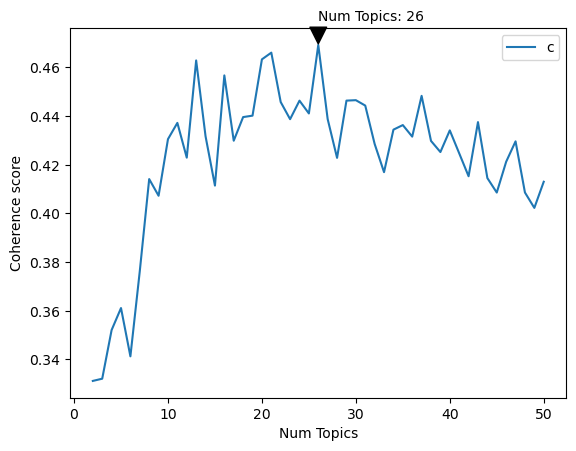

In [16]:
import matplotlib.pyplot as plt
import numpy as np

limit=51; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')

# Find the index of the maximum coherence value
max_index = np.argmax(coherence_values)

# Annotate the peak in the plot with the number of topics
plt.annotate(f'Num Topics: {x[max_index]}', xy=(x[max_index], coherence_values[max_index]), xytext=(x[max_index], coherence_values[max_index] + 0.01),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Save the plot
plt.savefig('coherence_values.png')

plt.show()

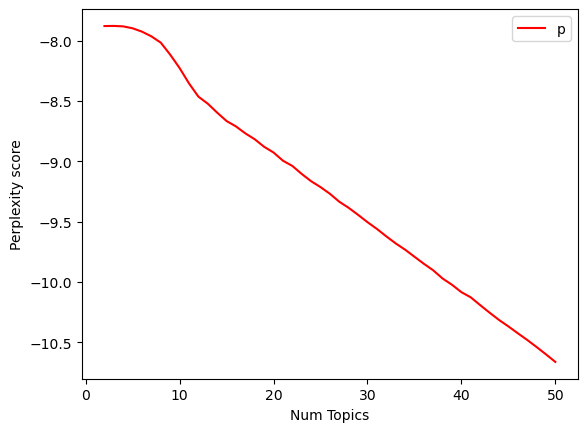

In [12]:
# Show perplexity score graph

import matplotlib.pyplot as plt

limit=51; start=2; step=1;
x_plex = range(start, limit, step)
plt.plot(x_plex, perplexity_values,color='red')
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
# Save the plot
plt.savefig('perplexity_values.png')

plt.show()

### 26 Topics

In [17]:
topics = best_lda.show_topics(26, 5)

for topic in topics:
    print(topic)

(0, '0.014*"new" + 0.014*"year" + 0.010*"location" + 0.009*"restaurant" + 0.007*"day"')
(1, '0.078*"burger" + 0.071*"fry" + 0.025*"cheese" + 0.016*"good" + 0.016*"onion"')
(2, '0.040*"cake" + 0.017*"flavor" + 0.017*"sweet" + 0.012*"indian" + 0.011*"yogurt"')
(3, '0.060*"coffee" + 0.037*"donut" + 0.016*"waffle" + 0.015*"cafe" + 0.015*"brunch"')
(4, '0.110*"pho" + 0.049*"vietnamese" + 0.042*"mi" + 0.031*"spring" + 0.029*"banh"')
(5, '0.068*"taco" + 0.029*"food" + 0.029*"mexican" + 0.027*"salsa" + 0.025*"chip"')
(6, '0.074*"salad" + 0.034*"chicken" + 0.027*"lunch" + 0.017*"fresh" + 0.016*"soup"')
(7, '0.032*"bar" + 0.023*"place" + 0.016*"good" + 0.012*"drink" + 0.012*"night"')
(8, '0.026*"mom" + 0.021*"na" + 0.016*"hubby" + 0.013*"gon" + 0.012*"good"')
(9, '0.015*"dish" + 0.011*"delicious" + 0.010*"vegan" + 0.010*"flavor" + 0.009*"menu"')
(10, '0.041*"shrimp" + 0.027*"steak" + 0.026*"crab" + 0.021*"seafood" + 0.020*"fried"')
(11, '0.046*"chicken" + 0.024*"meat" + 0.024*"sauce" + 0.021*"po

In [18]:
# Save the model to a file
best_lda.save('best_lda.gensim')

In [6]:
#best_lda = gensim.models.ldamodel.LdaModel.load('best_lda.gensim')


In [19]:
from gensim.models import CoherenceModel
coherencemodel_best = CoherenceModel(model=best_lda, texts=docs, dictionary=dictionary, coherence='c_v')
perplex_best= best_lda.log_perplexity(vecs, total_docs=None)

In [20]:
print("--26 Topics--")
print(f"Coherence Score: {coherencemodel_best.get_coherence()}")
print(f"Perplexity Score: {perplex_best}")

--26 Topics--
Coherence Score: 0.4692262329837529
Perplexity Score: -9.269700526602023


### Code for generating topic word frequency images and graphs

In [21]:
words30_topics = best_lda.show_topics(26, 30)

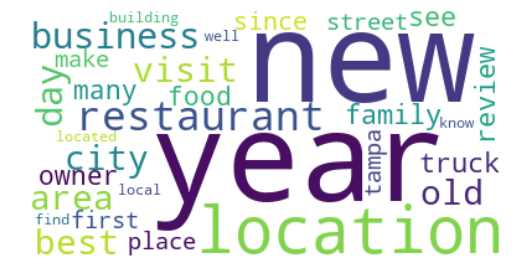

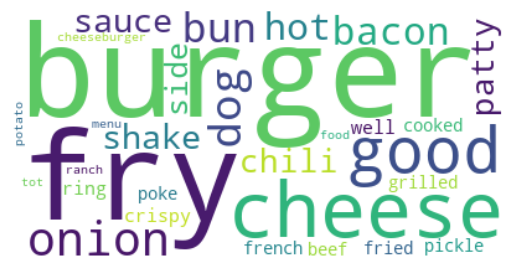

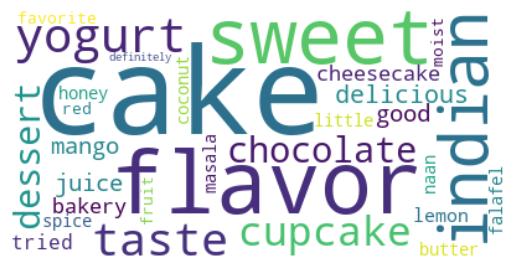

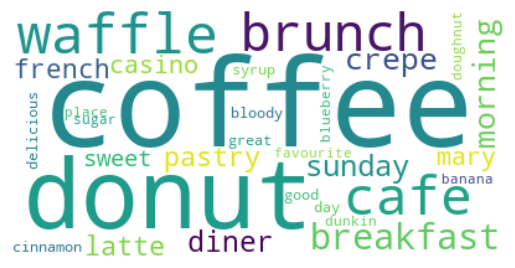

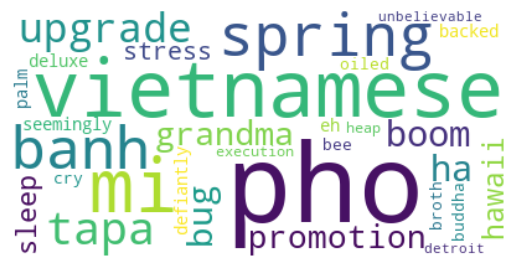

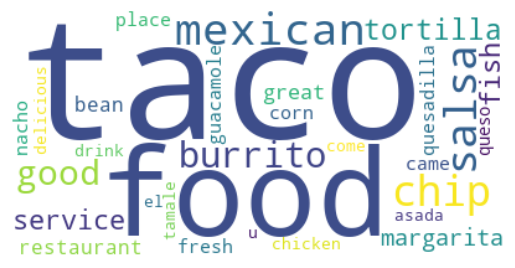

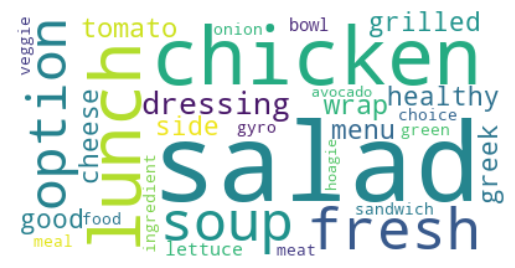

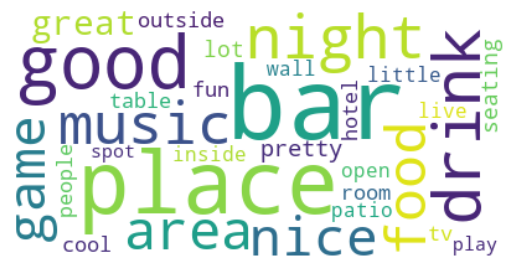

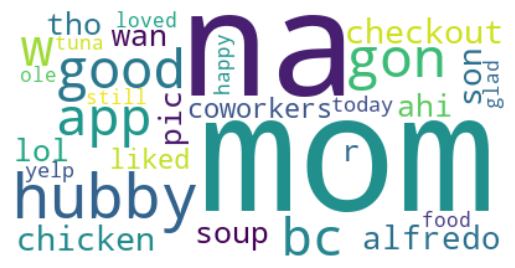

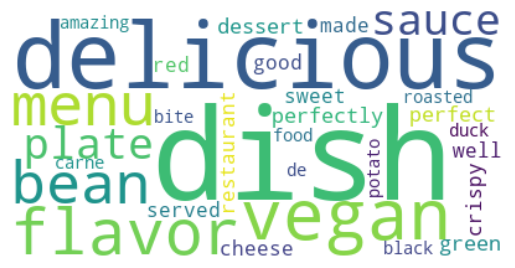

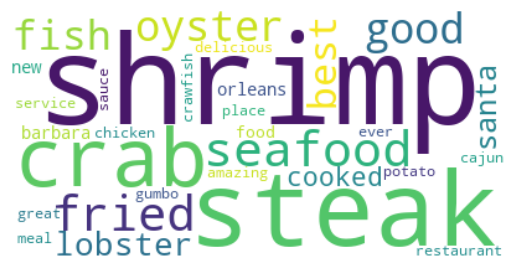

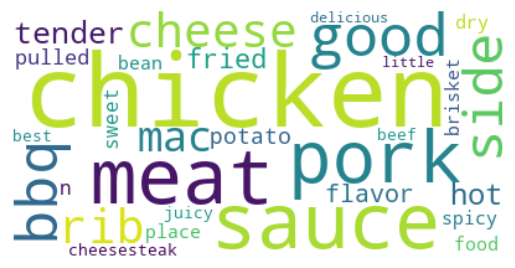

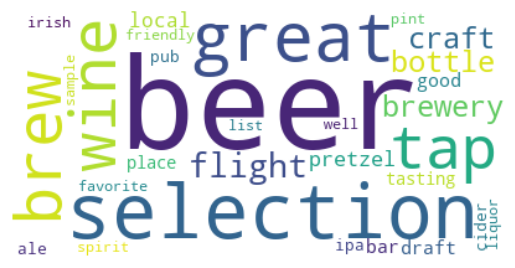

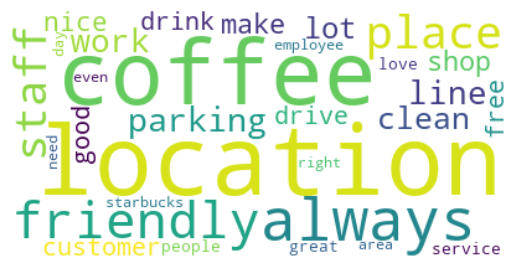

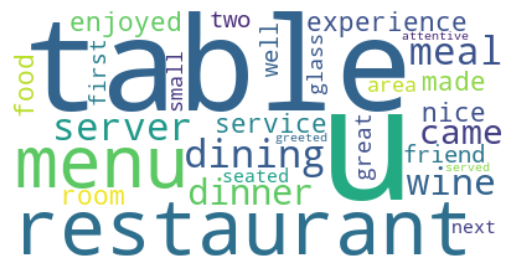

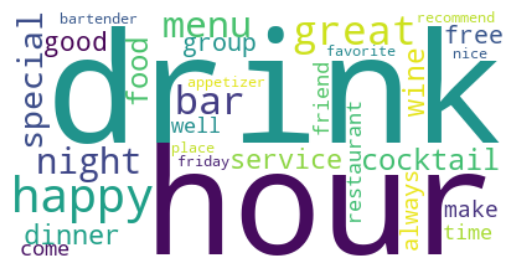

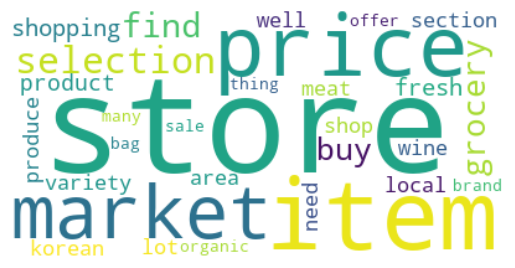

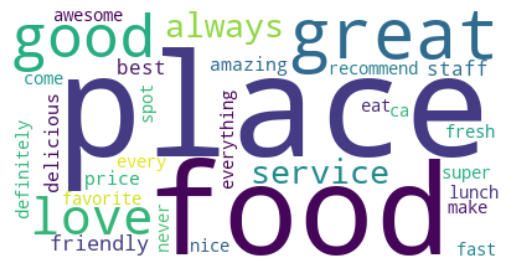

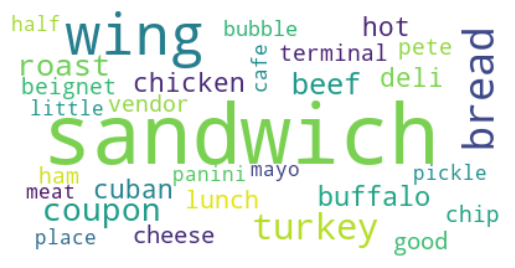

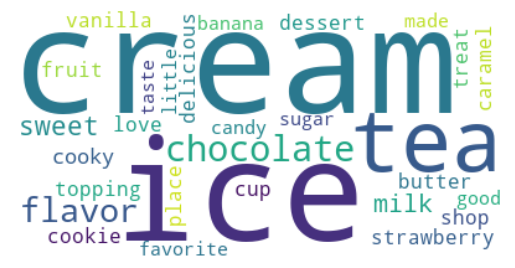

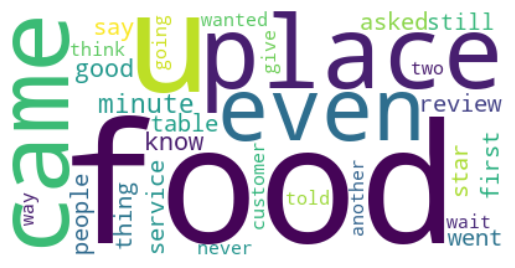

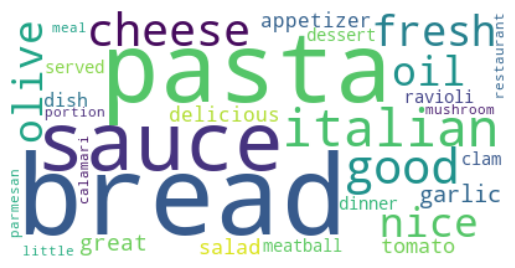

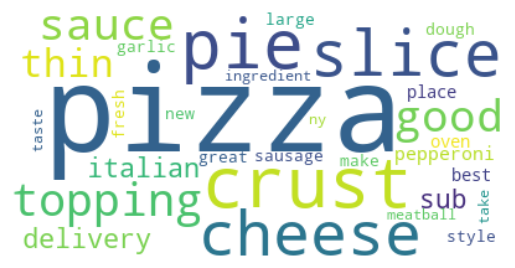

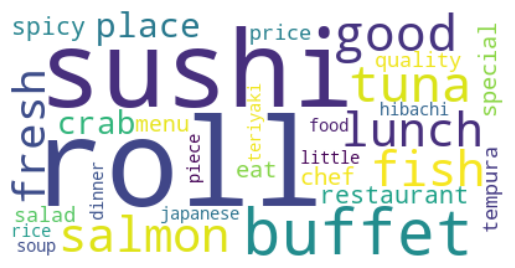

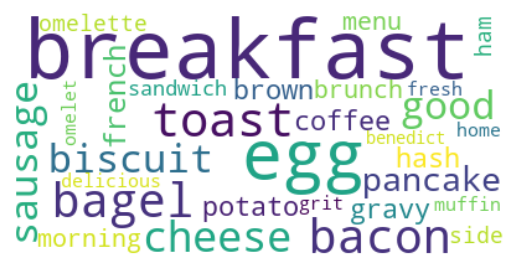

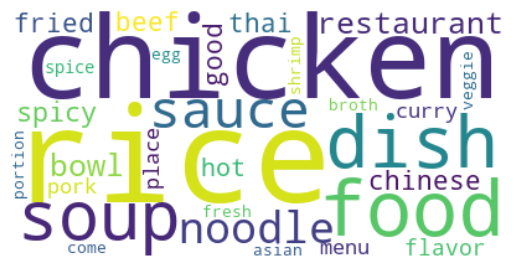

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

for i, topic in enumerate(words30_topics):
    # Extract words and their weights from each topic
    words = [word for word, _ in best_lda.show_topic(topic[0], 30)]
    weights = [weight for _, weight in best_lda.show_topic(topic[0], 30)]

    # Create a frequency distribution
    freq_dist = dict(zip(words, weights))
    # plt.figure(figsize=(12,8))
    # plt.title(f'Topic: {i}')
    # plt.bar(freq_dist.keys(), freq_dist.values())
    # # Save the bar chart
    # plt.savefig(f'topic_{i}_bar_chart.png')
    # plt.show()

    # Create a word cloud
    wc = WordCloud(background_color="white", max_words=1000)
    wordcloud = wc.generate_from_frequencies(freq_dist)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    # Save the word cloud
    plt.savefig(f'topic_{i}_word_cloud.png')
    plt.show()

In [40]:
import pandas as pd


col1 = 'topic'
col2 = 'top_ten_words'
dct = {col1: [], col2: []}
no_top_words = 10

for topic_idx in range(best_lda.num_topics):
    top_words = [word for word, _ in best_lda.show_topic(topic_idx, topn=no_top_words)]
    dct[col1].append(str(topic_idx))
    dct[col2].append(" ".join(top_words))

# Create a DataFrame from the dictionary
df = pd.DataFrame(dct)
# Set the maximum column width to None so that the entire content of 'top_ten_words' is displayed
pd.set_option('display.max_colwidth', None)



#generated by interpretation after obtaining the top ten words of each topic
topic_summaries=["Business Location","Burger Place","Dessert","Cafe","Vietnamese Food", "Mexican Food","Salad","Bar",
"Other", "Vegan Food","Seafood","BBQ","Brewery","Coffee","Restaurant Dining","Happy Hour and Drinks","Grocery",
"Food and Service","Roasted Meats Deli","Ice Cream","Food experience","Italian Food","Pizza","Sushi","Breakfast","Asian Food"]

# Add the topic summaries to the DataFrame
df['topic_summary'] = topic_summaries

# Display the DataFrame
df

,topic,top_ten_words,topic_summary
0,0,new year location restaurant day business visit best city area,Business Location
1,1,burger fry cheese good onion dog bun bacon hot sauce,Burger Place
2,2,cake flavor sweet indian yogurt taste cupcake chocolate dessert delicious,Dessert
3,3,coffee donut waffle cafe brunch breakfast morning crepe sunday diner,Cafe
4,4,pho vietnamese mi spring banh tapa upgrade ha boom bug,Vietnamese Food
5,5,taco food mexican salsa chip burrito good tortilla fish service,Mexican Food
6,6,salad chicken lunch fresh soup option dressing wrap tomato good,Salad
7,7,bar place good drink night music food area nice game,Bar
8,8,mom na hubby gon good w app bc checkout chicken,Other
9,9,dish delicious vegan flavor menu bean plate sauce perfectly green,Vegan Food


In [41]:
df.to_csv('topic_summary.csv', index=False)

### Finding most dominant topic of each document

In [25]:
import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    sent_topics_df = pd.DataFrame()

    for i, row in tqdm(enumerate(ldamodel[corpus])):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.DataFrame([[int(topic_num), round(prop_topic,4), topic_keywords]], columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])], ignore_index=True)
            else:
                break

    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=best_lda, corpus=vecs, data=docs)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

df_dominant_topic.head(10)

102326it [14:07, 120.70it/s]


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,17,0.7144,"place, food, great, good, love, always, service, friendly, staff, best","[yet, disappointed, bruschetta, bad, deal, stop, placating, people, wrong, deal, bad, service, sudden, never, bad, disappointed]"
1,1,20,0.4915,"food, u, place, came, even, minute, know, good, first, star","[ok, see, bar, smell, mold, smoke, higher, rating, pissed, kt, good, rid, scum, bag, dead, wright, staff, good, good, drink, great, bar, gordon, ramsey, london, grille, everyone, deserves, second, chance, update, review, guy, know, wo, disappointed, least, felt, last, visit]"
2,2,20,0.3689,"food, u, place, came, even, minute, know, good, first, star","[decent, place, bartender, rude, however, mean, bartender, provide, pleasant, drink, fine, top, shelf, food, well, mixed, review, shrimp, bruschetta, awesome, spinach, artichoke, dip, huge, enough, chip, little, greasy, maybe, pita, bread, instead, nacho, eh, much, come, long, way, need, come, little, longer, though]"
3,3,20,0.7269,"food, u, place, came, even, minute, know, good, first, star","[food, four, star, bartender, shorting, dollar, plus, cent, change, negative, far, coming, part, bar, see, pissed, gave, fairly, neg, review, super, positive, angry, short, chubby, brown, hair, balding, came, chased, ok, still, change, odd]"
4,4,20,0.6072,"food, u, place, came, even, minute, know, good, first, star","[ok, star, service, even, angry, never, know, bartender, yes, mine, sent, message, felt, jerk, busy, take, consideration, anger, sort, bashed, describing, jerky, duck, spring, awesome, jim, good, three, face, eve, moment, gone, keep, going, kt, good, people, acknowledge, mistake, nice, skinny, witch, end, bar]"
5,5,17,0.5341,"place, food, great, good, love, always, service, friendly, staff, best","[best, experience, ever, kt, john, server, amazing, awesome, food, awesome, well, sooooo, happy, went, great, job, guy, keep, great, work, btw, burger, amazing, thanks]"
6,6,15,0.2851,"drink, hour, happy, great, bar, menu, night, special, cocktail, food","[went, happy, hour, let, tell, great, place, glenside, great, area, went, friend, kt, nice, absolutely, right, cant, wait, come, summer, friend, window, come, great, place, grab, drink, relax, eat, chicken, tender, special, happy, hour, came, good, hot, cant, wait, take, boyfriend, forgot, keswick, theater, cant, wait, see, show, sort, picture, soon]"
7,7,14,0.3452,"u, table, restaurant, menu, dining, server, meal, wine, dinner, came","[knight, roudtable, quest, year, good, restaurant, eat, going, ot, keswick, theatre, year, since, graced, door, keswick, tavern, closest, eating, establishment, keswick, theatre, glenside, matinee, performance, sunday, afternoon, able, belly, bar, see, long, running, establishment, changed, first, note, changed, beer, selection, keswick, hopped, craft, beer, band, wagon, sported, twenty, beer, tap, along, respectible, bottle, list, selecton, wasnt, estoeric, solid, nice, alternative, macrobrews, ended, ordering, yard, george, washington, porter, part, revolutionary, ale, series, always, happy, see, tap, disappoint, since, lunch, decided, food, selectoin, small, uninteresting, issue, price, nothing, dollar, menu, appetizer, salad, sandwich, ended, ordering, wing, measly, portion, eigth, wing, wing, drummies, ...]"
8,8,17,0.1937,"place, food, great, good, love, always, service, friendly, staff, best","[happened, pop, wanted, closed, glad, food, better, great, bar, food, dry, rub, wing, delicious, cooked, well, crowed, considering, definitely, head, tavern]"
9,9,17,0.3051,"place, food, great, good, love, always, service, friendly, staff, best","[breakfast, buffet, busy, place, lack, attention, detail, staff, often, disappears, eat, due, convenience, give, know, lunch, dinner]"


In [26]:
df_dominant_topic.to_csv('dominant_topic.csv', index=False)

In [27]:
df_dominant_topic.shape

(102326, 5)

In [28]:
df_set.shape

(102326, 35)

In [29]:
# Assume df_other is the other DataFrame you want to merge with df_dominant_topic
df_merged = df_dominant_topic.join(df_set, how='outer')

In [30]:
df_merged.shape

(102326, 40)

In [31]:
df_merged.to_csv('lda_review_topics_updated.csv', index=False)

In [8]:
#df_merged = pd.read_csv('lda_review_topics_updated.csv')

In [32]:
# Get the value counts
counts = df_merged['Dominant_Topic'].value_counts()

# Convert the value counts to a DataFrame
df_counts = pd.DataFrame(counts).reset_index()

# Rename the columns
df_counts.columns = ['Dominant_Topic', 'Count']

# Display the DataFrame
df_counts

,Dominant_Topic,Count
0,20,19300
1,17,12652
2,13,9424
3,14,7106
4,7,6934
5,25,5008
6,15,4541
7,0,3693
8,19,3650
9,11,2982


In [ ]:
# pip install pyldavis

In [33]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [35]:
# Generate the visuals
visual= gensimvis.prepare(best_lda, vecs, dictionary)

In [36]:
pyLDAvis.save_html(visual, "lda_topic_viz.html")

## Generating Bigrams

### not yet done

In [44]:
def join_docs(docs):
    # docs is a list of documents returned by corpus2docs.
    joined_docs = [' '.join(doc) for doc in docs]
    single_text_string = ' '.join(joined_docs)
    return single_text_string

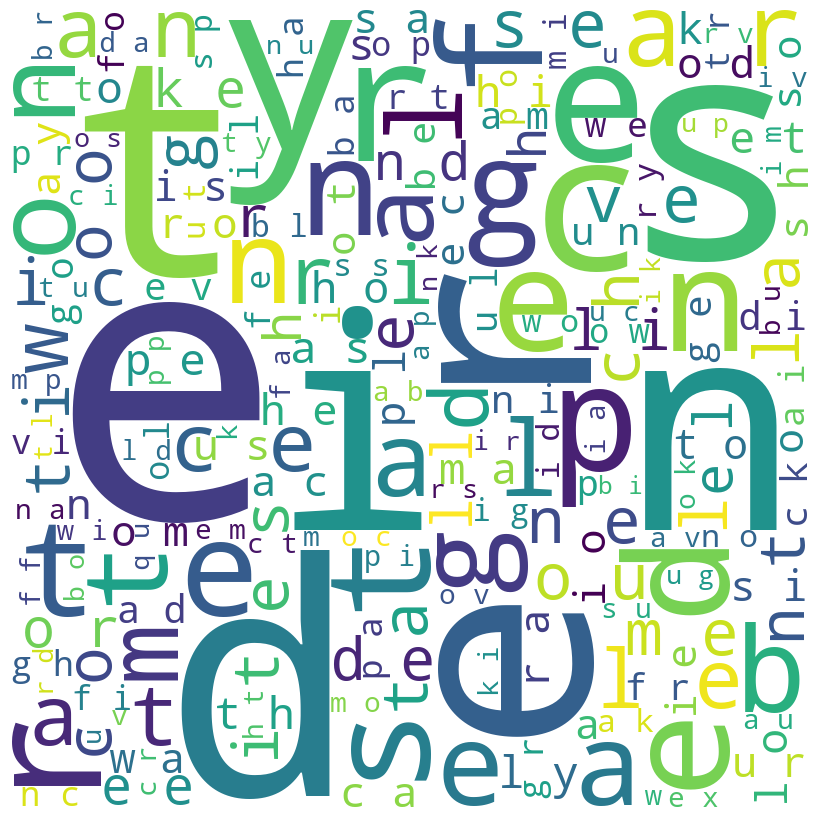

In [47]:
from nltk import bigrams
from collections import Counter
all_text = 

# Generate bigrams
bigram_list = list(bigrams(all_text))

# Convert bigram tuples into a readable string format
bigram_strings = [' '.join(bigram) for bigram in bigram_list]

# Generate bigram frequencies
bigram_freq = Counter(bigram_strings)

# Generate a word cloud for bigrams
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate_from_frequencies(bigram_freq)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

# Export bigram frequencies to a CSV file
bigram_freq_df = pd.DataFrame(bigram_freq.items(), columns=['Bigram', 'Frequency'])
bigram_freq_df.to_csv('bigram_frequencies.csv', index=False)

### Generating Trigrams